In [1]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
average_change_sea_levels_df = pd.read_csv('Resources/25_Change_in_Mean_Sea_Levels.csv')



In [3]:
average_change_sea_levels_df

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Sea Okhotsk,D12/16/1992,10.11
1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Adriatic Sea,D12/17/1992,32.73
2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Andaman Sea,D12/17/1992,-14.88
3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Arabian Sea,D12/17/1992,-9.76
4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66
...,...,...,...,...,...,...,...,...,...,...,...,...
39612,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",South China,D04/14/2024,4.02
39613,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Southern Ocean,D04/14/2024,3.11
39614,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Tropics,D04/14/2024,3.20
39615,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D04/14/2024,3.14


In [4]:
bodies_of_water = average_change_sea_levels_df['Measure'].unique().tolist()
bodies_of_water

['Sea Okhotsk',
 'Adriatic Sea',
 'Andaman Sea',
 'Arabian Sea',
 'Atlantic Ocean',
 'Baltic Sea',
 'Bay Bengal',
 'Bering Sea',
 'Caribbean Sea',
 'Gulf Mexico',
 'Indian Ocean',
 'Indonesian',
 'Mediterranean',
 'Nino',
 'North Pacific',
 'North Sea',
 'Pacific Ocean',
 'Sea Japan',
 'South China',
 'Southern Ocean',
 'Tropics',
 'World',
 'Yellow Sea',
 'North Atlantic',
 'Persian Gulf']

In [5]:
average_change_sea_levels_df['Measure'].value_counts()

Measure
World             1600
Indian Ocean      1587
Southern Ocean    1587
Atlantic Ocean    1587
Nino              1587
Tropics           1587
Pacific Ocean     1586
North Pacific     1586
Bering Sea        1586
Indonesian        1585
Caribbean Sea     1585
South China       1585
Arabian Sea       1585
North Atlantic    1585
Gulf Mexico       1584
Baltic Sea        1584
Mediterranean     1584
Sea Okhotsk       1583
Sea Japan         1583
North Sea         1583
Bay Bengal        1583
Yellow Sea        1582
Andaman Sea       1580
Adriatic Sea      1578
Persian Gulf      1575
Name: count, dtype: int64

In [6]:
# Trying to find the total sea level change from 1992 to 2024 for each body of water
grouped_df = average_change_sea_levels_df.groupby(by=['Measure']).sum()
total_sea_change = grouped_df[['Value']]
total_sea_change

,Value
Measure,
Adriatic Sea,37897.84
Andaman Sea,61579.17
Arabian Sea,56200.74
Atlantic Ocean,48196.39
Baltic Sea,67680.54
Bay Bengal,60020.19
Bering Sea,30903.69
Caribbean Sea,52883.62
Gulf Mexico,71461.79


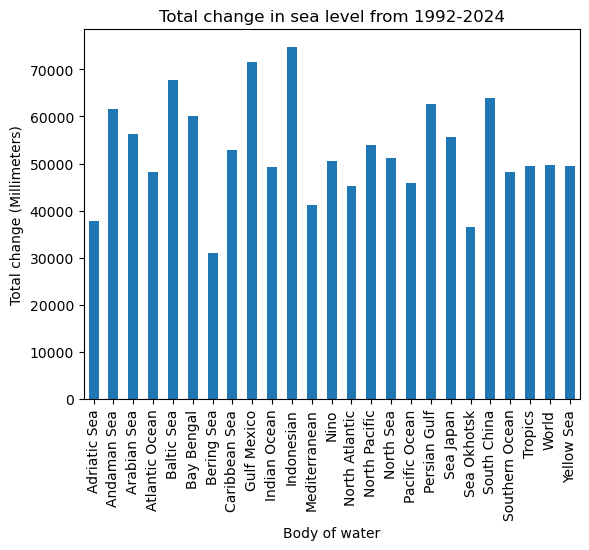

In [7]:
grouped_df.plot(kind='bar', y='Value', legend=False)
plt.ylabel('Total change (Millimeters)')
plt.xlabel('Body of water')
plt.title('Total change in sea level from 1992-2024')
plt.show()

**Potential questions to ask:**

    - Are water levels rising or decreasing?
    - How have sea level changes differed between regions?
    - How has the change in sea level differed over time?
    - What will the sea level changes look like in the near future?

## Are water levels increasing or decreasing?

In [10]:
world_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'World']

#### I am making a new column to display the cumulative change for each day in order to have a graph that makes the most sense to compare.

In [12]:
initial_sea_level = 0
world_df['Total Change'] = initial_sea_level + world_df['Value'].cumsum()
world_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_32296\783912562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df['Total Change'] = initial_sea_level + world_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value,Total Change
21,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D12/17/1992,-14.72,-14.72
47,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D12/27/1992,-19.32,-34.04
71,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D01/05/1993,-22.12,-56.16
92,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D01/15/1993,-23.42,-79.58
123,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D01/24/1993,-24.72,-104.30


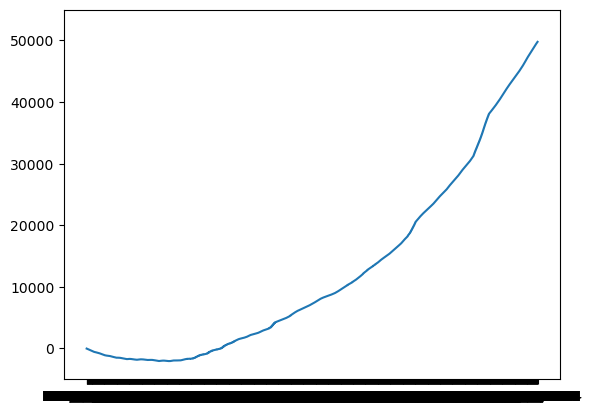

In [13]:
y_axis = world_df['Total Change']
x_axis = world_df['Date']
plt.plot(x_axis, y_axis)
plt.ylim(-5000, 55000)
plt.show()

## How has the change in sea level differed between regions?

In [15]:
pacific_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Pacific Ocean']
atlantic_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Atlantic Ocean']
indian_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Indian Ocean']

I am seperating the three major oceans in this data in order to try and compare them as their own regions.

In [17]:
pacific_df.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
16,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D12/17/1992,-14.7
44,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D12/27/1992,-29.7
66,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D01/05/1993,-32.0
87,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D01/15/1993,-35.3
117,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D01/24/1993,-31.9


In [18]:
atlantic_df.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66
35,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/27/1992,-10.96
53,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D01/05/1993,-18.06
96,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D01/16/1993,-15.16
106,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D01/24/1993,-20.96


In [19]:
indian_df.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
10,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D12/17/1992,-26.92
38,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D12/27/1992,-11.72
59,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D01/05/1993,-5.12
81,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D01/15/1993,-3.12
110,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D01/24/1993,-10.22


In [20]:
initial_sea_level = 0
pacific_df['Total Change'] = initial_sea_level + pacific_df['Value'].cumsum()
pacific_df = pacific_df.set_index('Date')
pacific_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_32296\3727811476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacific_df['Total Change'] = initial_sea_level + pacific_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Value,Total Change
Date,,,,,,,,,,,,
D12/17/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-14.7,-14.7
D12/27/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-29.7,-44.4
D01/05/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-32.0,-76.4
D01/15/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-35.3,-111.7
D01/24/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-31.9,-143.6


In [21]:
initial_sea_level = 0
atlantic_df['Total Change'] = initial_sea_level + atlantic_df['Value'].cumsum()
atlantic_df = atlantic_df.set_index('Date')
atlantic_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_32296\800401511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlantic_df['Total Change'] = initial_sea_level + atlantic_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Value,Total Change
Date,,,,,,,,,,,,
D12/17/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-13.66,-13.66
D12/27/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-10.96,-24.62
D01/05/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-18.06,-42.68
D01/16/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-15.16,-57.84
D01/24/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-20.96,-78.80


In [22]:
initial_sea_level = 0
indian_df['Total Change'] = initial_sea_level + indian_df['Value'].cumsum()
indian_df = indian_df.set_index('Date')
indian_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_32296\743650038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indian_df['Total Change'] = initial_sea_level + indian_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Value,Total Change
Date,,,,,,,,,,,,
D12/17/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-26.92,-26.92
D12/27/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-11.72,-38.64
D01/05/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-5.12,-43.76
D01/15/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-3.12,-46.88
D01/24/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-10.22,-57.10


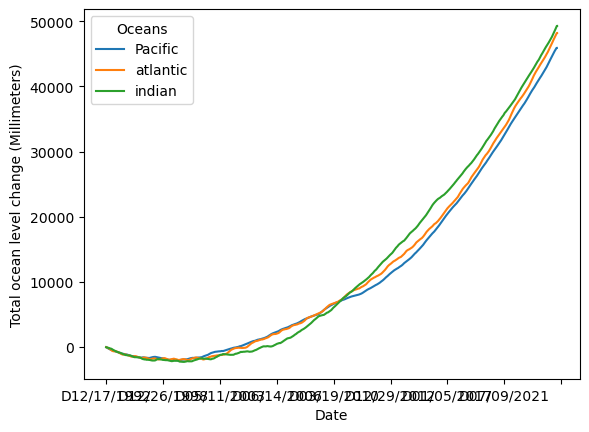

In [43]:
# The graph came out wierd. I am pretty sure I am doing something wrong here, 
# and just need to find a better way to create this graph.
fig, ax = plt.subplots()

pacific_df['Total Change'].plot(ax=ax, kind='line', label='Pacific')
atlantic_df['Total Change'].plot(ax=ax, kind='line', label='atlantic')
indian_df['Total Change'].plot(ax=ax, kind='line', label='indian')

ax.set_ylabel('Total ocean level change (Millimeters)')
ax.set_xlabel('Date')
plt.legend(title='Oceans')
plt.show()